In [4]:
import pandas as pd
df = pd.read_csv("patient_dataset.csv")

In [6]:
df.head()




,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64.0,1,66.0,160.0,83.0,160.0,1.80,0.012,negative
1,21.0,1,94.0,98.0,46.0,296.0,6.75,1.060,positive
2,55.0,1,64.0,160.0,77.0,270.0,1.99,0.003,negative
3,64.0,1,70.0,120.0,55.0,270.0,13.87,0.122,positive
4,55.0,1,64.0,112.0,65.0,300.0,1.08,0.003,negative


In [8]:
df.tail()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
1314,44.0,1,94.0,122.0,67.0,204.0,1.63,0.006,negative
1315,66.0,1,84.0,125.0,55.0,NaN,1.33,0.172,positive
1316,45.0,1,85.0,168.0,104.0,96.0,1.24,4.250,positive
1317,54.0,1,58.0,117.0,68.0,443.0,5.80,0.359,positive
1318,51.0,1,94.0,157.0,79.0,134.0,50.89,1.770,positive


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1238 non-null   float64
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1293 non-null   float64
 3   Systolic blood pressure   1265 non-null   float64
 4   Diastolic blood pressure  1307 non-null   float64
 5   Blood sugar               1274 non-null   float64
 6   CK-MB                     1273 non-null   float64
 7   Troponin                  1294 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 92.9+ KB


In [12]:
df.shape


(1319, 9)

In [14]:
df.isnull().sum()

Age                         81
Gender                       0
Heart rate                  26
Systolic blood pressure     54
Diastolic blood pressure    12
Blood sugar                 45
CK-MB                       46
Troponin                    25
Result                       0
dtype: int64

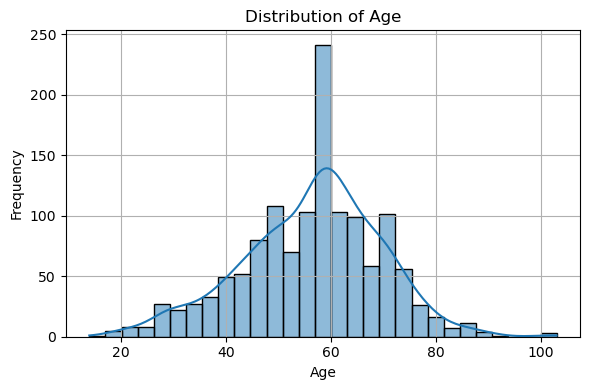

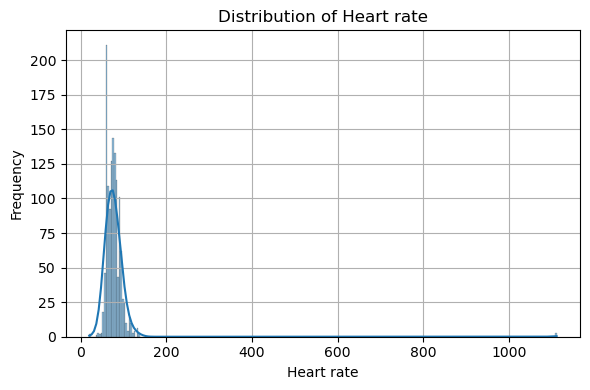

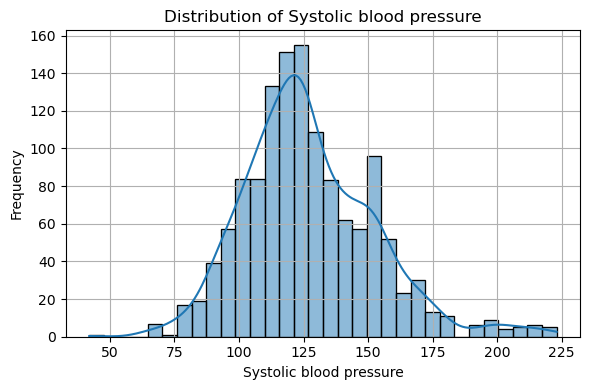

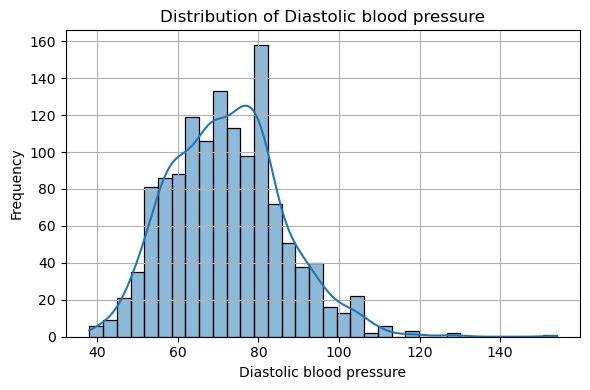

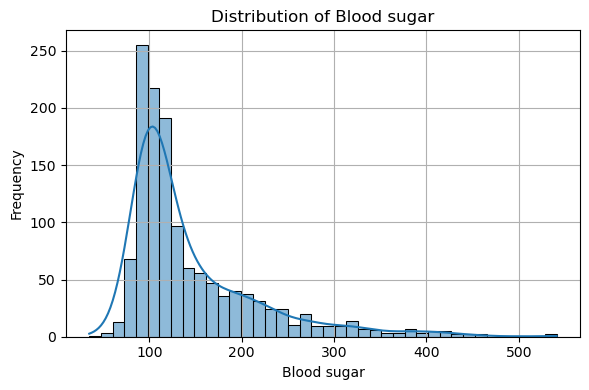

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
columns = [
    'Age',
    'Heart rate',
    'Systolic blood pressure',
    'Diastolic blood pressure',
     'Blood sugar']
for col in columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    

In [22]:
columns = [
    'Age',
    'Heart rate',
    'Systolic blood pressure',
    'Diastolic blood pressure',
     'Blood sugar',
     'CK-MB',                       
     'Troponin']
for col in columns:
    df[col] = df[col].fillna(df[col].median())
    

In [24]:
df.isnull().sum()


Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [26]:
df.duplicated().sum()

0

In [30]:
for col in columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers=df[(df[col]<lower_bound) | (df[col] > upper_bound)]
    print(outliers.shape[0])

16
30
36
12
97


In [32]:
import numpy as np

def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df
columns = [
    'Age',
    'Heart rate',
    'Systolic blood pressure',
    'Diastolic blood pressure',
     'Blood sugar',
     'CK-MB',                       
     'Troponin']



for col in columns:
    df = cap_outliers(df, col)

In [34]:
for col in columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers=df[(df[col]<lower_bound) | (df[col] > upper_bound)]
    print(outliers.shape[0])

0
0
0
0
0
0
0
